<a href="https://colab.research.google.com/github/FelixCinq-Mars/Zombie-Apocalypse-Curve-Modelling/blob/main/Zombie_Lab_Ayda%2C_Kellie%2C_F%C3%A9lix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Zombie Lab Report
## Ayda Asgari, Kellie Elkrief and Félix Cinq-Mars
###360-420-DW sec.00002
 

#Description of our modified model 
#####     To propose a more realistic model, humanity will try to preserve itself through the vaccination of susceptibles, as well as destroying removed zombies with magic cursed knives. The susceptible individuals (S) can come into contact with zombies (Z) at a rate of BETA (𝜷). However, the susceptibles have a chance at immunity by receiving a vaccine (V). The parameter DELTA (δ) represents the rate at which a susceptible person becomes vaccinated (per day). In the vaccinated state, a certain percentage of individuals are not immune and can get infected by coming into contact with a zombie at a rate of OMEGA (Ω). Once infected, they enter the latent (L) category. In order to prevent themselves from getting attacked by zombies, susceptibles are able to remove zombies (R) at a rate of ALPHA (𝛂), while vaccinated people are able to remove zombies at a rate of PI (𝜋). These removed zombies can resurrect and re-enter the zombie state at a rate of ZETA (ζ). Also, the removed zombies can become completely destroyed (D) and permanently removed from the face of the Earth by vaccinated individuals who use the powers of the curse knives at a rate of GAMMA (γ). 



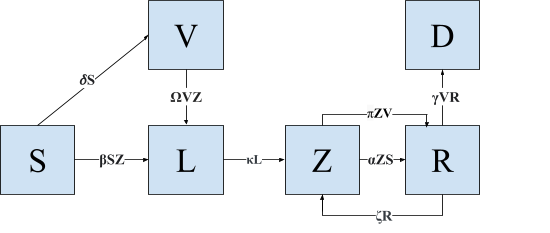


Figure 1: An Updated Zombie Epidemic Model






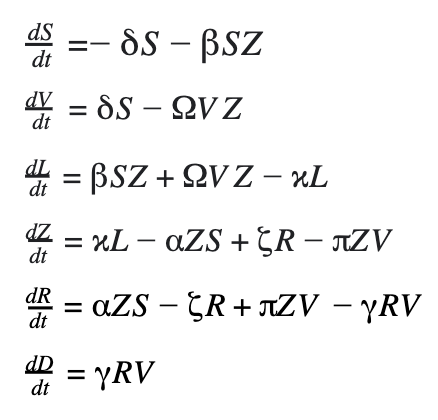

#Explanation of our new parameters
#####Our goal in this lab was to increase human survival by destroying zombies from the face of the Earth and vaccinating a large portion of our population. We changed the time period to 100 days to ensure we got a better representation of the experiment. 

#####We decided to vaccinate a certain proportion of our susceptibles to give them immunity. Our goal was to vaccinate 0.80% of the population each day. Thus, we made the vaccination rate per day 0.0080. We also had to take into account that not everybody is immune, and thus had to create an immunity failure rate. We said our vaccine would be 0.05% ineffective each day, and converted this to a rate of 0.0005. 
#####We allowed for both susceptible individuals and vaccinated individuals to remove the most possible zombies. PI (𝜋), describing the rate at which vaccinated individuals remove zombies, was established through a process of trial and error. However, we had to consider the fact that there is a higher susceptible population than the vaccinated population, and thus the rate of removal by susceptibles must be higher than the rate of removal by the vaccinated. Since ALPHA was already defined as 0.005, we made PI a lower value of 0.0016. Also, there is a 0.16% chance of vaccinated people removing zombies each day. We considered that latent individuals cannot kill zombies because once susceptibles have been bitten by zombies, they become sick and no longer have the energy to fight zombies.
##### Additionally, to limit the amount of possible resurrections, we added the parameter of destruction, which allows for a zombie to be completely destroyed off the face of the earth. We said that only vaccinated individuals can completely destroy zombies since they are the only ones who can manifest the power of magic cursed knives. This cursing process occurred at a rate of GAMMA (γ). We kept this constant at a value of 0.0025 because we did not want to give our vaccinated population too much destruction power. Therefore, there is a 0.25% chance of vaccinated people destroying zombies each day.

#How the epidemic evolves
#####As demonstrated in the graph, by the end of the 100 days, the susceptible population declines to zero as some of them have become vaccinated and others latent then zombies. The vaccinated population increases slowly and decreases to just below 100,000 individuals as the zombie population emerges. At around 40 days, the zombie population increases but decreases to 0 by the end of the simulation. The amount of destroyed zombies increases to over 400,000 individuals. The latent population increases and decreases similarly to the zombie population. The removed population increases and decreases slowly throughout a period of 60 days near where the zombie population increases and decreases as well. Ultimately, vaccination and destruction by magic cursed knives allowed the human population to prevail, thus fulfilling our goal. 


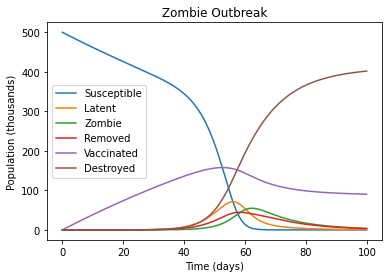

In [ ]:
"""
 Lab 1 - Modelling a zombie epidemic

 Author (python): A. Stewart
 Authors (java): S. Bhatnagar, J.F. Briere, J. Sumner
 Version: January 2020
 Description: Euler solution of zombie SIR model
"""

#Import packages
import numpy as np
import matplotlib.pyplot as plt

#Declare constants
DT = 0.1 #Time step (in days)
TFINAL = 100.0 #Total time of simulation (in days)
ALPHA = 0.005 #Zombie death rate (per 1000 persons per day)
BETA = 0.0095 #Zombie infection rate (per 1000 zombies per day)
KAPPA = 0.333 #Latent conversion rate (per day)
ZETA = 0.015 #Zombie resurrection rate (per day)

DELTA = 0.0080 #Vaccination rate (per day)
GAMMA = 0.0025 #Zombie destruction rate by vaccinated (per day)
PI = 0.0016 #Zombie removal rate by vaccinated  (per day)
OMEGA = 0.0005 #Immunity failure rate (per day)


#Total number of time steps
N = int((TFINAL/DT))

#Declare arrays
t = np.empty(N)	#Time (in days)
S = np.empty(N) #Susceptibles (in thousands)
V = np.empty(N) #Vaccinated (in thousands)
L = np.empty(N) #Latents (in thousands)
Z = np.empty(N) #Zombies (in thousands)
R = np.empty(N) #Removed (in thousands)
D = np.empty(N) #Destroyed (in thousands)

#Iniitial conditions
t[0] = 0 
S[0] = 500
V[0] = 0
L[0] = 0.001
Z[0] = 0
R[0] = 0
D[0] = 0
  
#Euler loop
i = 1
while i < N:
  #Evolve the differential equations
  S[i] = S[i-1] - BETA * S[i-1] * Z[i-1] * DT - DELTA * S[i-1] * DT
  V[i] = V[i-1] + DELTA * S[i-1] * DT - OMEGA * V[i-1] * Z[i-1] * DT 
  L[i] = L[i-1] + BETA * S[i-1]* Z[i-1] * DT - KAPPA * L[i-1] * DT + OMEGA * V[i-1] * Z[i-1] * DT 
  Z[i] = Z[i-1] + KAPPA * L[i-1] * DT - ALPHA * S[i-1] * Z[i-1] * DT + ZETA * R[i-1] * DT - PI * V[i-1] * Z[i-1] *DT
  R[i] = R[i-1] + ALPHA * S[i-1] * Z[i-1] * DT - ZETA * R[i-1] * DT - GAMMA * R[i-1] * V[i-1] * DT + PI * V[i-1] * Z[i-1] * DT
  D[i] = D[i-1] + GAMMA * R[i-1] * V[i-1] * DT
    
  #Increase the time and the loop counter by one step
  t[i] = t[i-1] + DT
  i = i + 1

#Plot the arrays
plt.plot(t,S,label='Susceptible')
plt.plot(t,L,label='Latent')
plt.plot(t,Z,label='Zombie')
plt.plot(t,R,label='Removed')
plt.plot(t,V,label='Vaccinated')
plt.plot(t,D,label ='Destroyed')


plt.title('Zombie Outbreak')
plt.xlabel('Time (days)')
plt.ylabel('Population (thousands)')
plt.legend()

plt.show()